<a href="https://colab.research.google.com/github/priyanshu3103/Decision-Tree/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Priyanshu Barapatre

Working as intern on GRIP@Spark foundation (data science and business analytics)

Task-01:Prediction using Decision Tree Algorithm 






In [ ]:
# Importing some libraries for creating decision tree to predict the data. 


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_text

In [ ]:
# Loading the dataset

data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Understanding the general information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Check the dimension of dataset

data.shape

(150, 6)

In [ ]:
# Check the null values on the given dataset

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

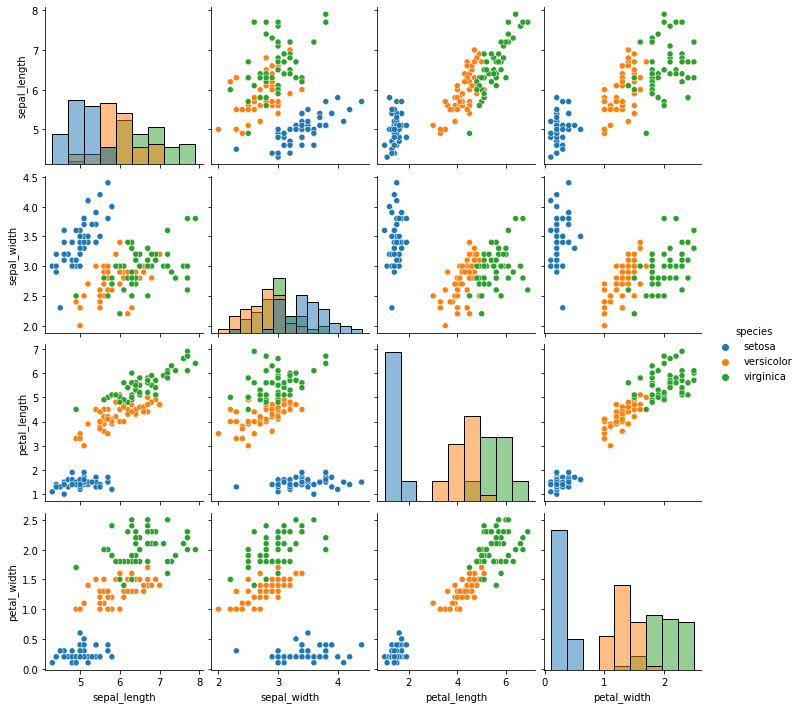

In [ ]:
# Visualize the data in the form of pairplot

import seaborn as sns
penguins = sns.load_dataset("iris")
sns.pairplot(penguins, hue="species", data=data,diag_kind="hist")

In [ ]:
# Extracting the data between independent and dependent Variable 

a=data.iloc[:, [1,2,3,4]].values
b=data.iloc[:, 5].values  

In [ ]:
# Spliting the data into training and testing

x_train, x_test, y_train, y_test= train_test_split(a, b, test_size= 0.2, random_state=42) 

In [ ]:
# Feature Scaling

st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    
df=pd.DataFrame(x_test)
df.head()

,0,1,2,3
0,0.354517,-0.579258,0.557645,0.023324
1,-0.133071,1.670289,-1.162597,-1.176203
2,2.304867,-1.029168,1.819157,1.489413
3,0.232620,-0.354304,0.442962,0.423166
4,1.207795,-0.579258,0.614987,0.289886


In [ ]:
# Fitting Decision Tree classifier to the training data 

classifier= DecisionTreeClassifier(criterion='gini', random_state=0)  
classifier.fit(x_train, y_train)  
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [ ]:
#Predicting the test set result

y_pred= classifier.predict(x_test) 
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
#Creating the Confusion matrix  

confusion= multilabel_confusion_matrix(y_test, y_pred)
confusion

array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]])

In [ ]:
# Predict the target value with best accuracy

from sklearn import metrics
print("The model accuracy score on unseen data is :",(metrics.accuracy_score(y_test, y_pred)* 100),"%")

The model accuracy score on unseen data is : 100.0 %


In [ ]:
# Represent the data in "Actual"  and "Predicted" form

pre_data=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
pre_data

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [ ]:
!pip install pydotplus
!pip install graphviz
!pip install dtreeviz

In [ ]:
# Load the iris data and split into two parts "iris.data" and "iris.target".
iris = load_iris()
x_train = iris.data
y_train = iris.target

# Fit the classifier with default hyper-parameters
classifier= DecisionTreeClassifier(random_state=1234)
classifier = classifier.fit(x_train, y_train)

In [ ]:
#Representing the final data in text format

text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



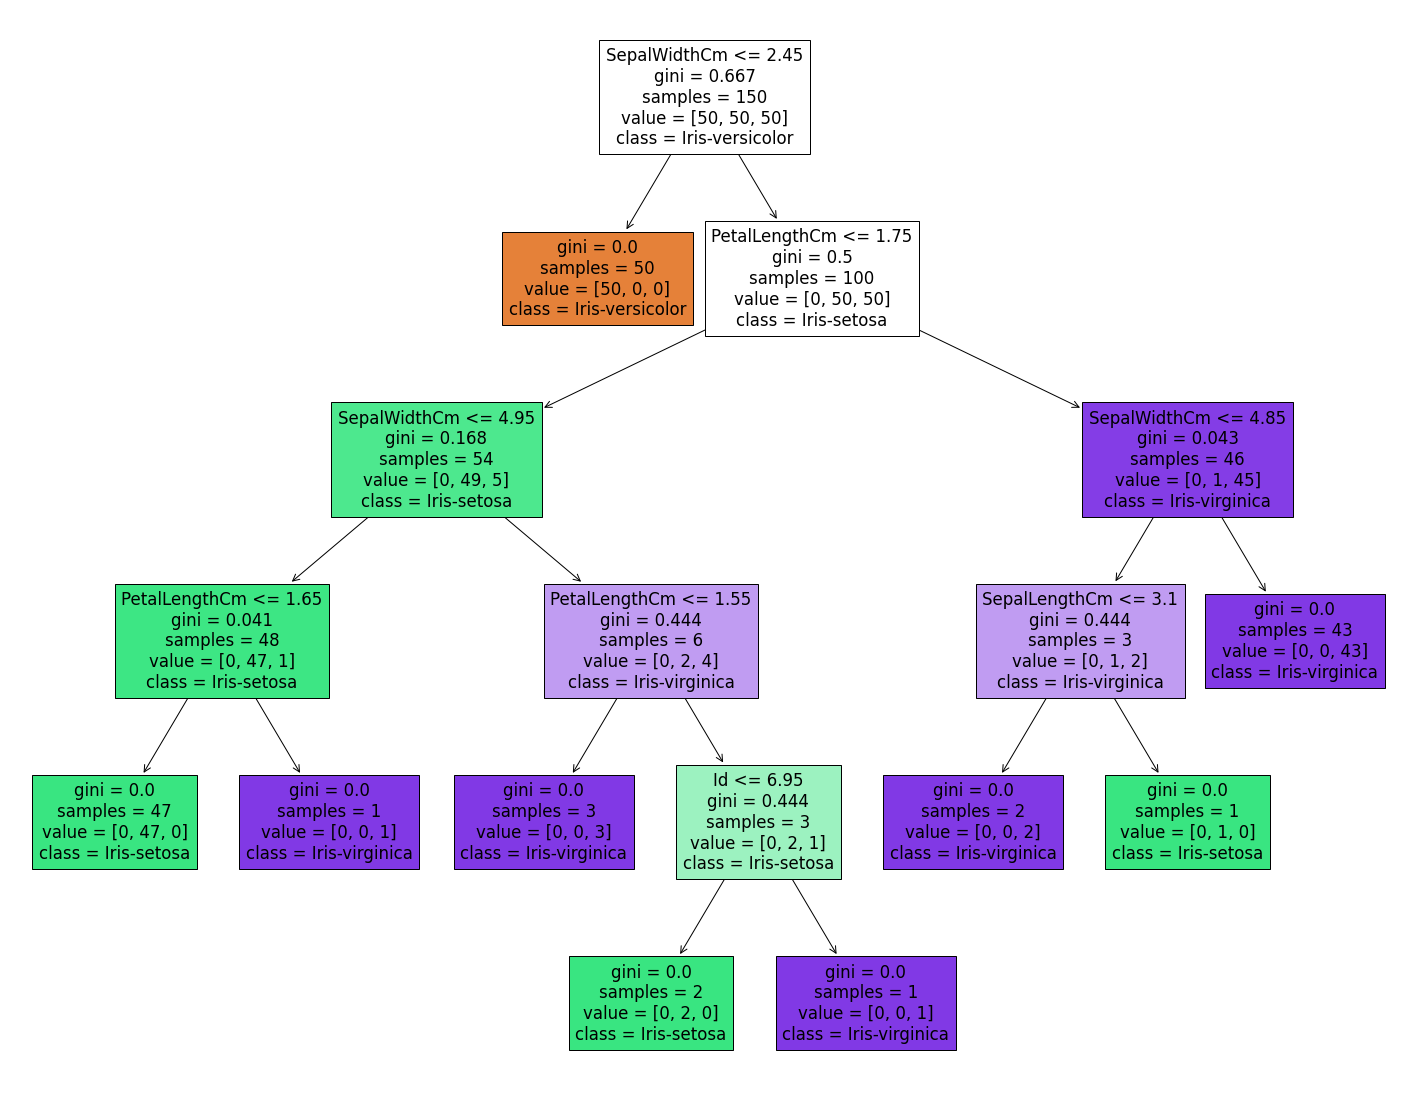

In [ ]:
#Representing the final data in graphical format

from sklearn import datasets
fig = plt.figure(figsize=(25,20))
D_tree= tree.plot_tree(classifier, feature_names=data.columns, class_names=["Iris-versicolor","Iris-setosa","Iris-virginica"],filled=True)